In [1]:
import pandas as pd
import os
import textstat as ts

In [2]:
chapters = pd.read_json("book_chapters_w_NER_sent.jl", lines=True)

In [3]:
chapters

,book,chapt_title,published,updated,chapt_author,chapt_text,num_comments,post_num,num_likes,liked_by,chapt_ner,chapt_pol,chapt_subj,fk_grade,gunning_fog,smog_index,dale_chall,mca_eflaw,read_time
0,Extra Chapters,Charlatan II,2020-05-01T04:00:29+00:00,None,ErraticErrata,"""To be a mage is to seek to master yourself so...",35,4586,25,"[oNBWiMcDSpn2iAkihbJrjE, ggW98yF8PXbw3sidcXB5R...","[[The Most Noble Art of Magic, WORK_OF_ART], [...",0.105368,0.497481,6.1,8.23,8.9,6.87,23.0,425.94
1,Extra Chapters,Five Stories,2020-08-04T04:00:23+00:00,2020-08-04T06:20:37+00:00,ErraticErrata,"There is a tale, in Levante, about vengeance. ...",85,4797,27,"[5dUESKRKHAp2at7Jupg5Jb, ggW98yF8PXbw3sidcXB5R...","[[Levante, NORP], [three, CARDINAL], [three, C...",0.059211,0.497969,6.6,8.29,8.7,6.83,25.6,443.01
2,Extra Chapters,Disjunction,2020-10-02T04:00:39+00:00,None,ErraticErrata,People were already calling it the Peace of Sa...,42,4947,25,"[5dUESKRKHAp2at7Jupg5Jb, oNBWiMcDSpn2iAkihbJrj...","[[First, ORDINAL], [Salia, PERSON], [summer, D...",0.126987,0.524592,6.1,8.15,8.8,7.24,22.8,299.74
3,Extra Chapters,Winter III,2019-11-01T04:09:06+00:00,2019-12-15T20:10:39+00:00,ErraticErrata,"""Good Gods, man, you can't simply fire arrows ...",55,4285,22,"[5dUESKRKHAp2at7Jupg5Jb, ggW98yF8PXbw3sidcXB5R...","[[first, ORDINAL], [Aldred Alban, PERSON], [Ca...",0.074524,0.448287,7.4,9.63,9.6,7.60,27.4,277.71
4,Extra Chapters,Malanza,2020-09-01T04:01:22+00:00,None,ErraticErrata,I The statue was titled ' Lorenzo Triumphant' ...,71,4871,26,"[5dUESKRKHAp2at7Jupg5Jb, oNBWiMcDSpn2iAkihbJrj...","[[Lorenzo Triumphant, PERSON], [Lorenzo Malanz...",0.056486,0.495907,6.1,7.83,8.3,6.95,23.3,353.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Extra Chapters,Conspiracy I,2016-09-07T04:37:02+00:00,2016-09-07T06:50:55+00:00,ErraticErrata,"""In its infancy, the Fifteenth was in the awkw...",46,890,25,"[Rd8kSXj47rF8Dd6AtsBzHP, gkiafAuakxJccMYC6yczP...","[[Fifteenth, ORDINAL], [Juniper, PERSON], [Ais...",0.058203,0.514528,6.4,7.61,8.9,7.24,19.7,330.25
689,Extra Chapters,Regard,2017-01-04T17:46:27+00:00,2017-09-18T00:10:02+00:00,ErraticErrata,"""Refuge is not a city so much as it is a clust...",102,1407,24,"[Rd8kSXj47rF8Dd6AtsBzHP, CgAQHF4R5sVdZBfULnDEj...","[[Refuge, GPE], [the Lady of the Lake, PERSON]...",0.040347,0.480989,5.5,7.28,7.8,7.00,21.1,255.34
690,Extra Chapters,Beast,2016-12-07T05:00:05+00:00,None,ErraticErrata,"""I stared into the abyss and found what stared...",54,1291,28,"[Rd8kSXj47rF8Dd6AtsBzHP, CgAQHF4R5sVdZBfULnDEj...","[[the Kabbalis Book of Darkness, WORK_OF_ART],...",0.002204,0.455718,2.7,5.25,6.8,6.41,15.2,307.66
691,Extra Chapters,Red Skies,2016-11-02T04:09:17+00:00,None,ErraticErrata,"""This eye for an eye business is horridly prop...",47,1190,20,"[Rd8kSXj47rF8Dd6AtsBzHP, CgAQHF4R5sVdZBfULnDEj...","[[Sanguinia II, PERSON], [Warlock, PERSON], [T...",0.122728,0.505699,6.6,7.97,9.1,7.35,20.7,240.38


#### Readability Measures

In [4]:
chapters["fk_grade"] = chapters["chapt_text"].apply(ts.flesch_kincaid_grade)

In [5]:
chapters["gunning_fog"] = chapters["chapt_text"].apply(ts.gunning_fog)

In [6]:
chapters["smog_index"] = chapters["chapt_text"].apply(ts.smog_index)

In [7]:
chapters["dale_chall"] = chapters["chapt_text"].apply(ts.dale_chall_readability_score)

#### Other Measures

In [8]:
chapters["mca_eflaw"] = chapters["chapt_text"].apply(ts.mcalpine_eflaw)

In [9]:
chapters["read_time"] = chapters["chapt_text"].apply(ts.reading_time, ms_per_char=16.45) 
# mean time per character per Trauzettel-Klosinski et al, 2012
# unit isn't clear
# ms * per character * n_chars
# that divided by 1000
# end result is in seconds

#### Writing the Chapters to a new NDJSON

In [10]:
chapters.to_json("book_chapters_w_NER_sent_readability.jl", orient="records", lines=True)

### Looking at the trends in Readability

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150


#### Per Book Means

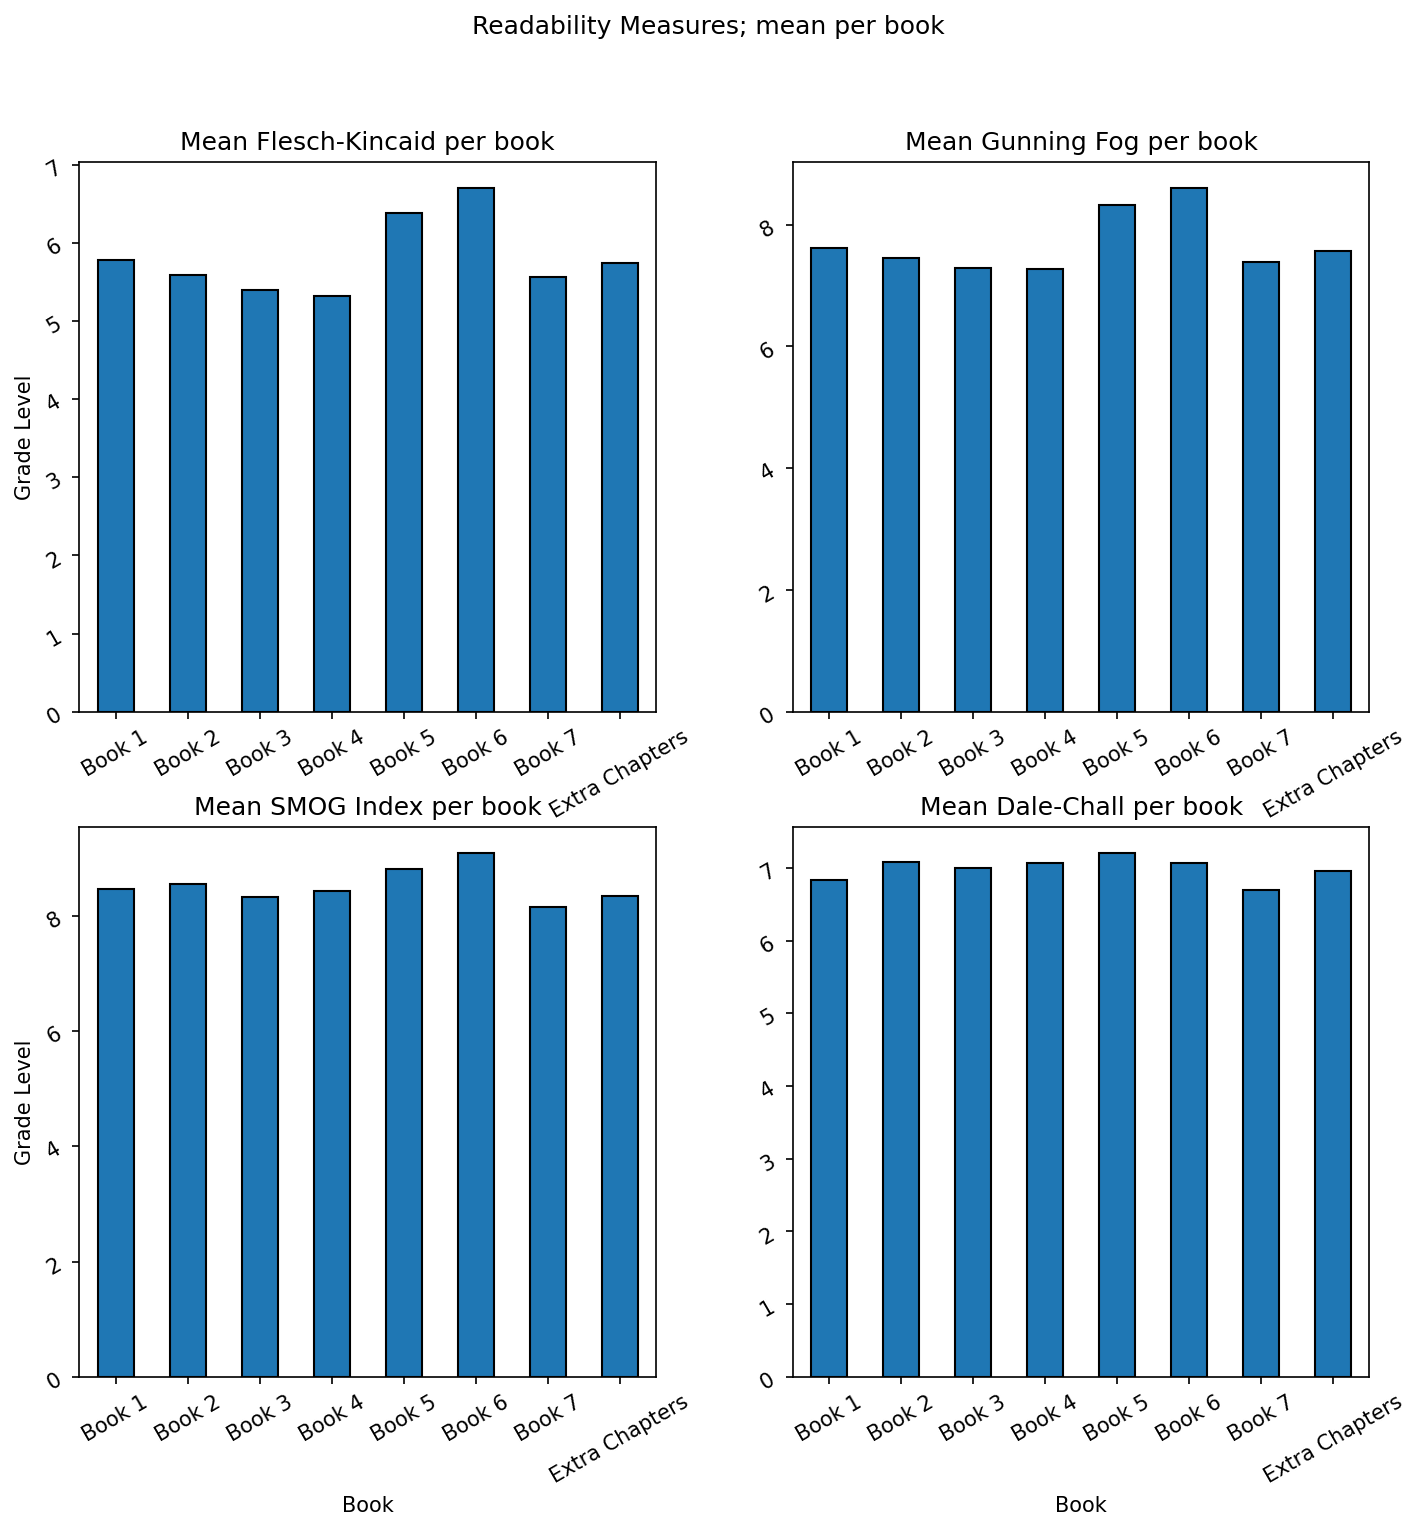

In [96]:
# this is an opportunity for us to go ahead and make some subplots
fig, ax = plt.subplots(2,2, figsize=(10, 10))
fig.suptitle("Readability Measures; mean per book")
fig.tight_layout(pad=3.5)


chapters.groupby("book")["fk_grade"].mean().plot(kind="bar", edgecolor="black", ax=ax[0,0])
ax[0, 0 ].set_title("Mean Flesch-Kincaid per book")
ax[0,0].tick_params(labelrotation=30)

chapters.groupby("book")["gunning_fog"].mean().plot(kind="bar", edgecolor="black", ax=ax[0,1])
ax[0, 1].set_title("Mean Gunning Fog per book")
ax[0,1].tick_params(labelrotation=30)

chapters.groupby("book")["smog_index"].mean().plot(kind="bar", edgecolor="black", ax=ax[1,0])
ax[1, 0].set_title("Mean SMOG Index per book")
ax[1,0].tick_params(labelrotation=30)


chapters.groupby("book")["dale_chall"].mean().plot(kind="bar", edgecolor="black", ax=ax[1,1])
ax[1, 1].set_title("Mean Dale-Chall per book")
ax[1,1].tick_params(labelrotation=30)



plt.setp(ax[-1, :], xlabel='Book') # setting the x axis to only be on the bottom
plt.setp(ax[:, 0], ylabel='Grade Level') # setting the y axis to only be on the left most
plt.show()

We can see that the readability metrics show stability in the mean over the books. While that isn't on a chapter to chapter basis, it's important to note that they all share a similar pattern. Of course, Gunning Fog is based on SMOG so it makes sense they would be close. In general though, it would seem that the reading level would seem to be around an 8th grade reading level at its highest. This would follow general recommendations for reading levels.

#### Trends over time

In [31]:
# cleaning up by converting the published and updated to datetime
chapters[["published","updated"]] = chapters[["published","updated"]].apply(pd.to_datetime)

#### Overall

In [ ]:
# This is a place for small multiples I'd say. 

In [34]:
# first step is to sort the chapters and make an ordinal representation of the timestamps
from scipy import stats

# we need to sort the chapters
chapters.sort_values(by="published", inplace=True)

# we need to make an ordinal -> linear regression doesn't like datetime
pub_ord = chapters["published"].apply(pd.Timestamp.toordinal) 

In [36]:
# next, we'd want to go ahead and take the linear_regression for each of the measurements

lin_reg_fk = stats.linregress(pub_ord, chapters["fk_grade"])
lin_reg_gf = stats.linregress(pub_ord, chapters["gunning_fog"])
lin_reg_smog = stats.linregress(pub_ord, chapters["smog_index"])
lin_reg_dc = stats.linregress(pub_ord, chapters["dale_chall"])

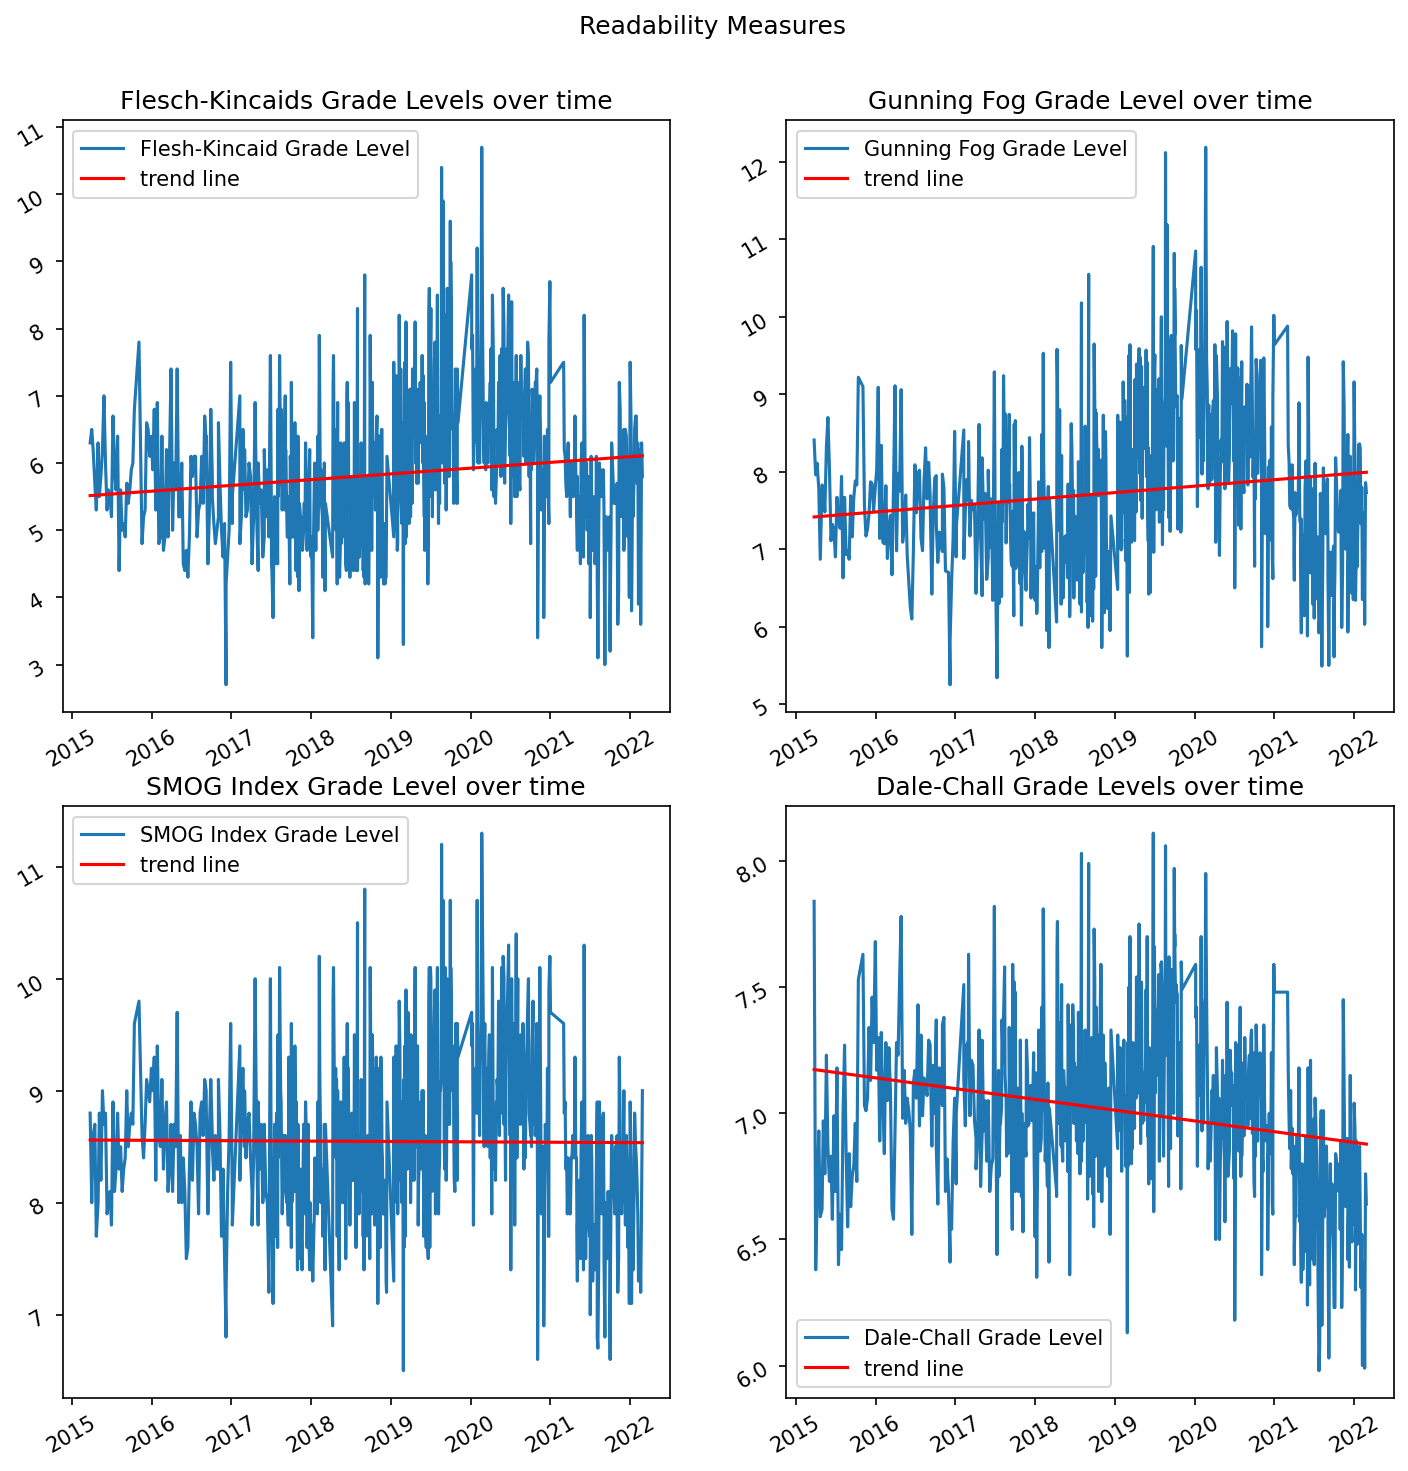

In [50]:
# finally, we want to go ahead and plot everything here. 
fig, ax = plt.subplots(2,2, figsize=(10, 10))
fig.suptitle("Readability Measures")
fig.tight_layout(pad=2.5)


ax[0, 0].plot(chapters["published"], chapters["fk_grade"], label="Flesh-Kincaid Grade Level") # our main trend
ax[0, 0].plot(chapters["published"], lin_reg_fk.intercept + lin_reg_fk.slope*pub_ord, 'r', label='trend line') # our trendline
ax[0, 0].set_title("Flesch-Kincaids Grade Levels over time")
ax[0,0].tick_params(labelrotation=30)
ax[0, 0].legend()

ax[0, 1].plot(chapters["published"], chapters["gunning_fog"], label="Gunning Fog Grade Level") # our main trend
ax[0, 1].plot(chapters["published"], lin_reg_gf.intercept + lin_reg_gf.slope*pub_ord, 'r', label='trend line') # our trendline
ax[0, 1].set_title("Gunning Fog Grade Level over time")
ax[0, 1].tick_params(labelrotation=30)
ax[0, 1].legend()

ax[1, 0].plot(chapters["published"], chapters["smog_index"], label="SMOG Index Grade Level") # our main trend
ax[1, 0].plot(chapters["published"], lin_reg_smog.intercept + lin_reg_smog.slope*pub_ord, 'r', label='trend line') # our trendline
ax[1, 0].set_title("SMOG Index Grade Level over time")
ax[1,0].tick_params(labelrotation=30)
ax[1, 0].legend()

ax[1, 1].plot(chapters["published"], chapters["dale_chall"], label="Dale-Chall Grade Level") # our main trend
ax[1, 1].plot(chapters["published"], lin_reg_dc.intercept + lin_reg_dc.slope*pub_ord, 'r', label='trend line') # our trendline
ax[1, 1].set_title("Dale-Chall Grade Levels over time")
ax[1, 1].tick_params(labelrotation=30)
ax[1, 1].legend()

plt.show()

We can see that overall, there isn't exaclty a great trend to be teased out here. On the one hand, the majority of the scores would seem to be around the range of 7th or 8th grade level. However, there are some spikes wehre it goes up to the 11th grade level or higher. As such, while this would likely be terms a fairly accessible series, there may be some slight opportunity for growth to be found here for the reader. Interestingly though, the trend lines for two of the metrics (SMOG and Dale-Chall) both seem to indicate degreasing grade levels over time. 

While we *could* take a look at the trends while finding the mean on a  yearly or monthly basis, the overall trend is likely to not move too much. Thus, this is informative enough for the time being. 

### Looking at trends in the other measures

#### Per Book means

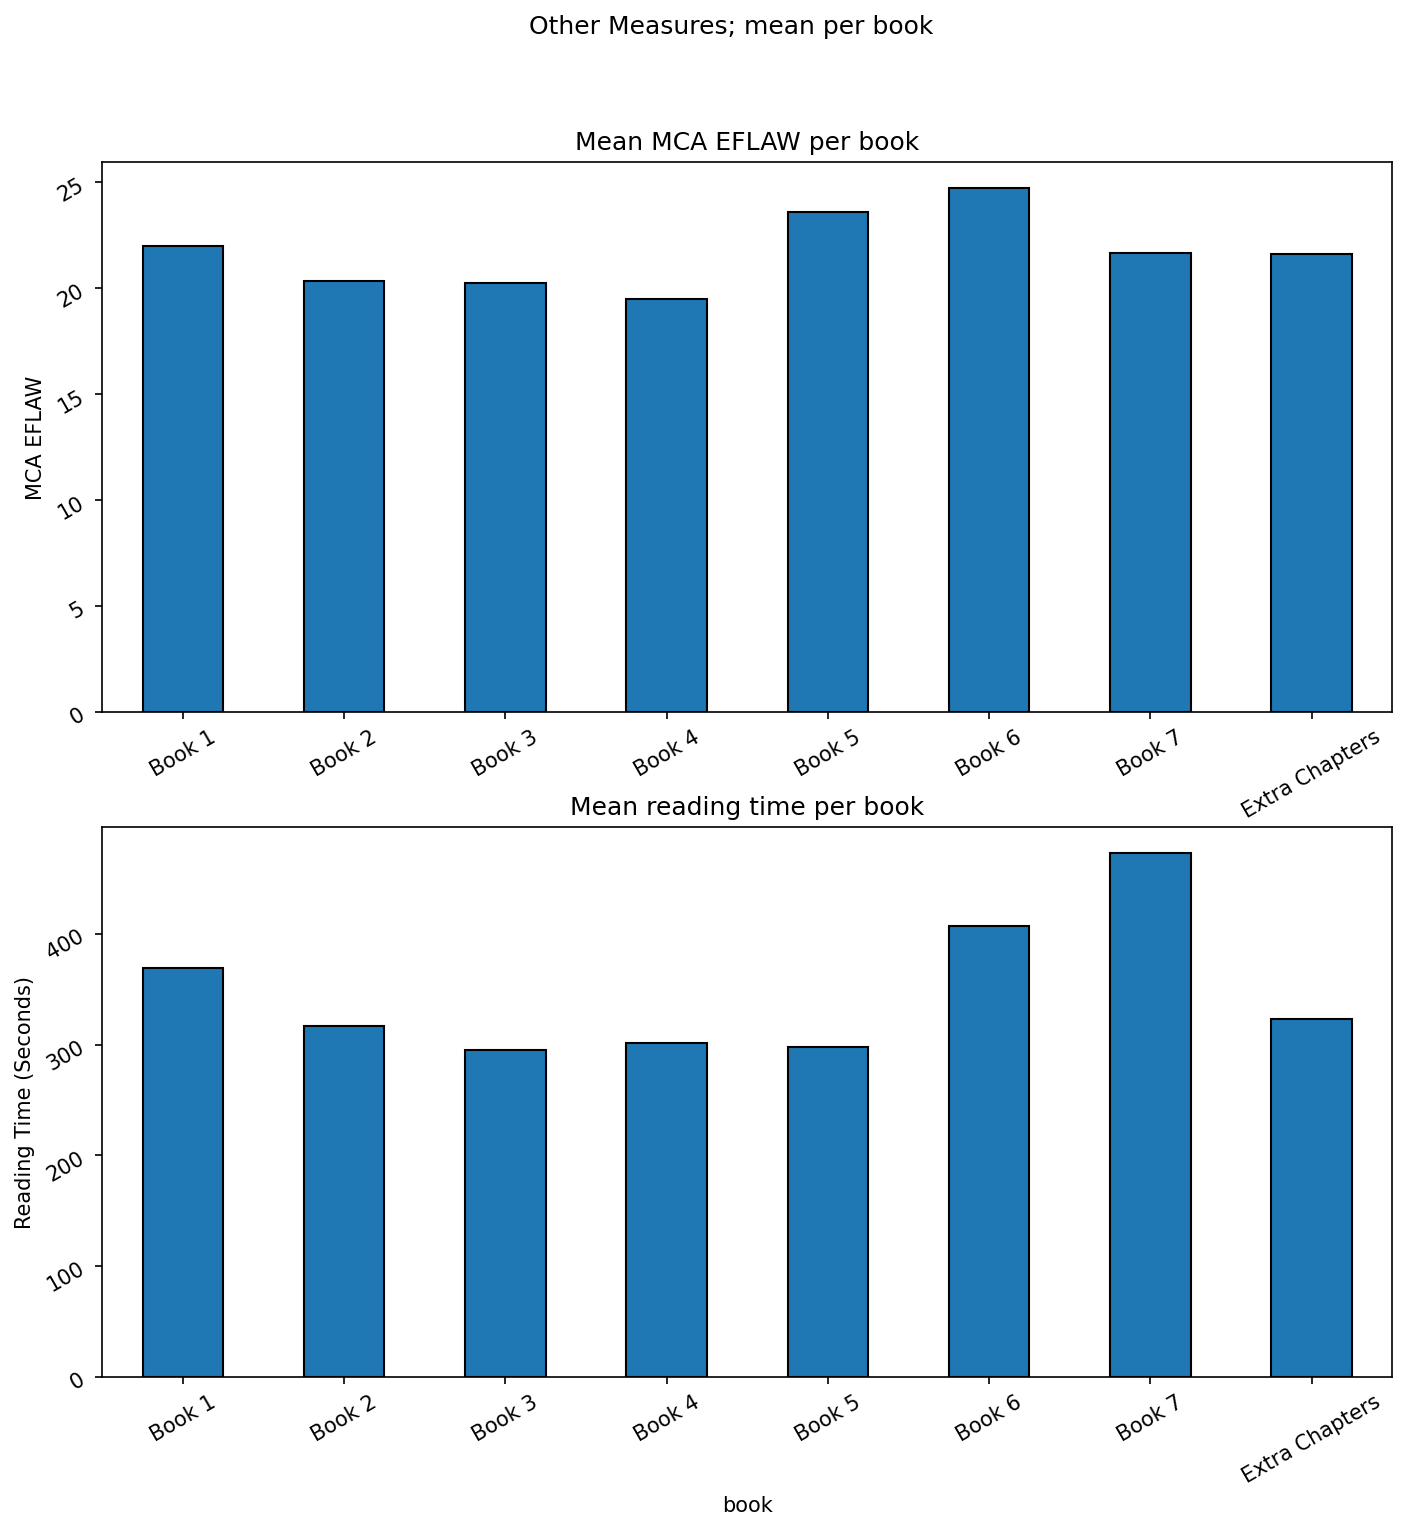

In [95]:
# this is an opportunity for us to go ahead and make some subplots
fig, ax = plt.subplots(2,1, figsize=(10, 10))
fig.suptitle("Other Measures; mean per book")
fig.tight_layout(pad=3.5)


chapters.groupby("book")["mca_eflaw"].mean().plot(kind="bar", edgecolor="black", ax=ax[0])
ax[0].set_title("Mean MCA EFLAW per book")
ax[0].tick_params(labelrotation=30)
ax[0].set_ylabel("MCA EFLAW")

chapters.groupby("book")["read_time"].mean().plot(kind="bar", edgecolor="black", ax=ax[1])
ax[1].set_title("Mean reading time per book")
ax[1].tick_params(labelrotation=30)
ax[1].set_ylabel("Reading Time (Seconds)")

plt.show()

Looking here, we can see that the Mean McAlpine EFLAW readability score, most of the books fall in below the recommended maximum score of 25. This metric tells us that overall, the entirity of the series ought to be approachable for individuals for whom English is not their first language. 

The mean reading time is in seconds and is based on a per-character calculation. I chose to base the per-character speed off the work of Trauzettel-Klosinski et al, 2012 because they provided one of the few answers I could find where I could get the speed for reading characters. I do have some concerns this approach underestimates the time to read a chapter. However, it has to be acknowledged that a per word approach would be problematic given varying word lengths (so too would a syllable based approach). In general here though, we can see that they should supposedly take around 300 or so seconds to read. That works out to about five minutes, but again, I have concerns about this metric. 

#### Over time

In [75]:
lin_reg_eflaw = stats.linregress(pub_ord, chapters["mca_eflaw"])
lin_reg_time = stats.linregress(pub_ord, chapters["read_time"])


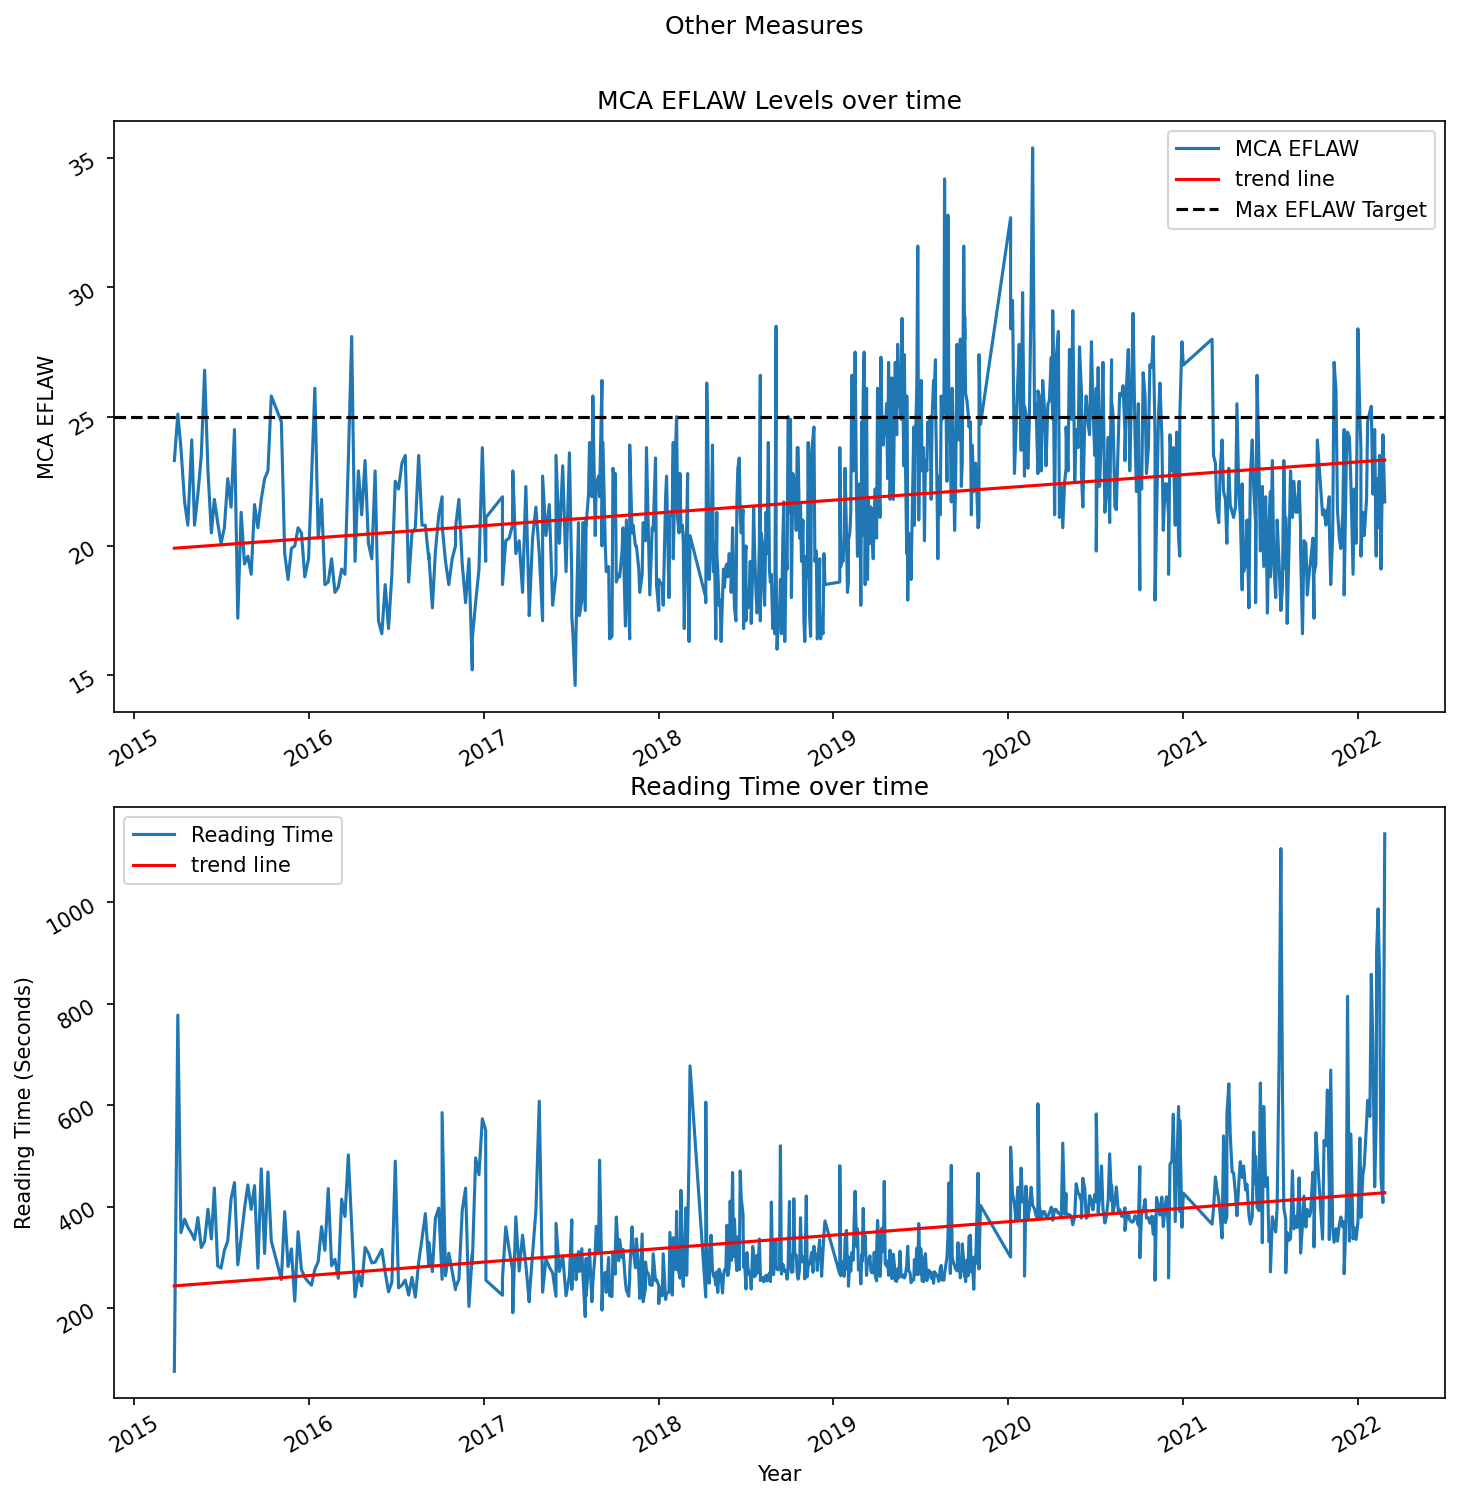

In [88]:
# finally, we want to go ahead and plot everything here. 
fig, ax = plt.subplots(2,1, figsize=(10, 10))
fig.suptitle("Other Measures")
fig.tight_layout(pad=2.5)

ax[0].plot(chapters["published"], chapters["mca_eflaw"], label="MCA EFLAW") # our main trend
ax[0].plot(chapters["published"], lin_reg_eflaw.intercept + lin_reg_eflaw.slope*pub_ord, 'r', label='trend line') # our trendline
ax[0].axhline(y=25, color='black', linestyle='--', label="Max EFLAW Target")
ax[0].set_title("MCA EFLAW Levels over time")
ax[0].tick_params(labelrotation=30)
ax[0].set_ylabel("MCA EFLAW")
ax[0].legend()

ax[1].plot(chapters["published"], chapters["read_time"], label="Reading Time") # our main trend
ax[1].plot(chapters["published"], lin_reg_time.intercept + lin_reg_time.slope*pub_ord, 'r', label='trend line') # our trendline
ax[1].set_title("Reading Time over time")
ax[1].tick_params(labelrotation=30)
ax[1].set_ylabel("Reading Time (Seconds)")
ax[1].legend()

plt.setp(ax[-1], xlabel='Year') # setting the x axis to only be on the bottom

plt.show()

Looking at the trends over time, we can begin to see that what we saw in the means wasn't everything. There is a trend of increasing EFLAW scores indicating that readability is decreasing for ESL readers even while the majority of the chapters fall below the score of 25. Reading time is also on a clear upward trend overtime. Of course, again, I have my concerns about the validity of that as a metric. However, while the actual values may not be reliable, the trend likely *is* reliable for us here.